<a href="https://colab.research.google.com/github/MelissaOrtiz05/Biblioteca/blob/main/img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

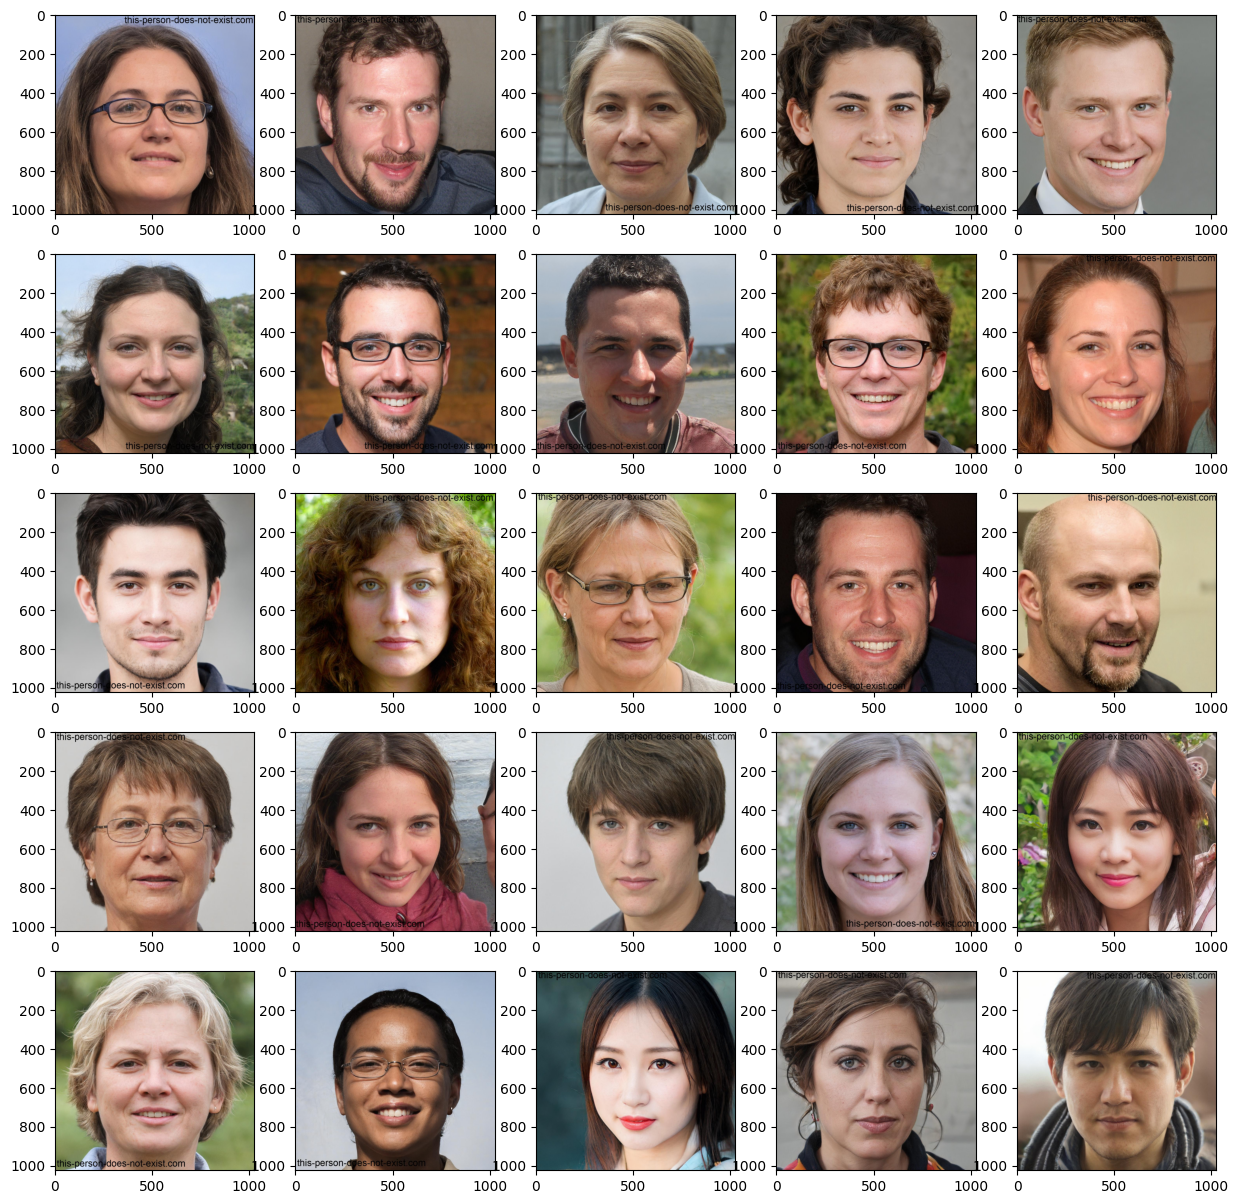

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta ='/content/imgFake'

imagenes =os.listdir(carpeta)


for i, nombreimg in enumerate (imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)


In [ ]:
!mkdir dataset
!mkdir dataset/imgReal
!mkdir dataset/imgFake


Found 73 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


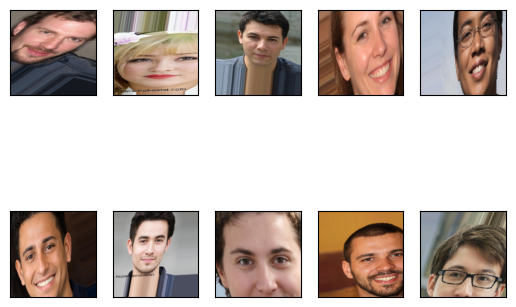

In [ ]:
#aumentar y cambiar proporciones de img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as numpy

#crear el dataset generador
datagen=ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range =0.25,
    height_shift_range = 0.25,
    shear_range=15,
    zoom_range=[0.5,1.5],
    validation_split=0.2 #20% de pruebas
)

#generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento=datagen.flow_from_directory('/content/dataset',target_size=(224,224),
                                                   batch_size=32, shuffle=True, subset='training')

data_gen_prueba=datagen.flow_from_directory('/content/dataset',target_size=(224,224),
                                                   batch_size=32, shuffle=True, subset='validation')


#imprimir prueba de entrenamiento

for imagen, etiqueta in data_gen_entrenamiento:
  for i in range (10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-feature-vector/2",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(3, activation='softmax')
])
m.build([None, 224, 224, 3])  # Batch input shape.


In [ ]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              410208    
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 414051 (1.58 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 410208 (1.56 MB)
_________________________________________________________________


In [ ]:
m.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
#entrenar el modelo

In [ ]:
EPOCAS=50

In [ ]:

historial=m.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_prueba
)

Epoch 1/50
3/3 [==============================] - 6s 2s/step - loss: 1.2193 - accuracy: 0.3014 - val_loss: 0.5654 - val_accuracy: 0.9444
Epoch 2/50
3/3 [==============================] - 4s 1s/step - loss: 0.5511 - accuracy: 0.8904 - val_loss: 0.4016 - val_accuracy: 0.8889
Epoch 3/50
3/3 [==============================] - 3s 829ms/step - loss: 0.3274 - accuracy: 0.8767 - val_loss: 0.2996 - val_accuracy: 0.8889
Epoch 4/50
3/3 [==============================] - 6s 3s/step - loss: 0.3429 - accuracy: 0.8767 - val_loss: 0.3157 - val_accuracy: 0.8889
Epoch 5/50
3/3 [==============================] - 3s 827ms/step - loss: 0.3443 - accuracy: 0.8767 - val_loss: 0.3135 - val_accuracy: 0.8889
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 0.3477 - accuracy: 0.8767 - val_loss: 0.2907 - val_accuracy: 0.8889
Epoch 7/50
3/3 [==============================] - 5s 2s/step - loss: 0.2808 - accuracy: 0.8767 - val_loss: 0.2213 - val_accuracy: 0.8889
Epoch 8/50
3/3 [===================

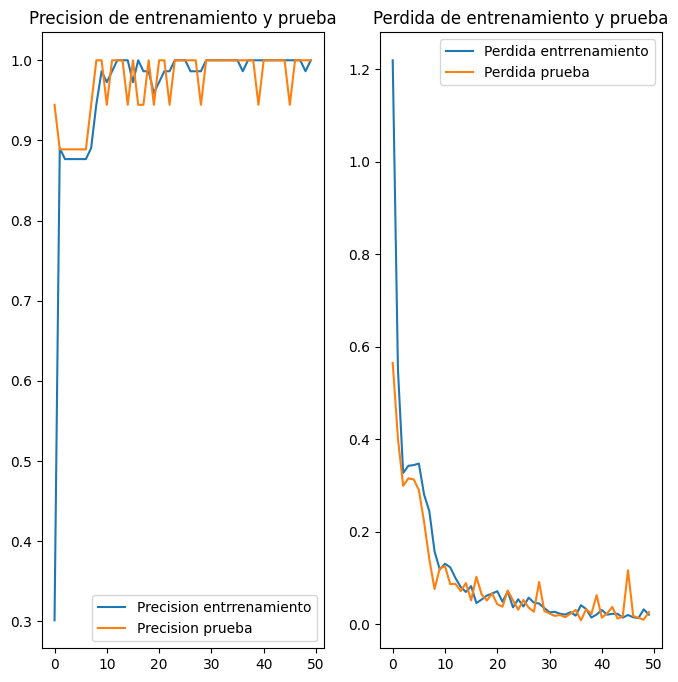

In [ ]:
#Grafica
acc=historial.history['accuracy']
val_acc=historial.history['val_accuracy']

loss=historial.history['loss']
val_loss=historial.history['val_loss']

rangoEpocas=range(50)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rangoEpocas, acc, label='Precision entrrenamiento')
plt.plot(rangoEpocas, val_acc, label='Precision prueba')
plt.legend(loc='lower right')
plt.title('Precision de entrenamiento y prueba')


plt.subplot(1,2,2)
plt.plot(rangoEpocas, loss, label='Perdida entrrenamiento')
plt.plot(rangoEpocas, val_loss, label='Perdida prueba')
plt.legend(loc='upper right')
plt.title('Perdida de entrenamiento y prueba')


plt.show()

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta=requests.get(url)
  img=Image.open(BytesIO(respuesta.content))
  img=numpy.array(img).astype(float)/255

  img=cv2.resize(img,(224,224))
  prediccion=m.predict(img.reshape(-1,224,224,3))
  return(numpy.argmax(prediccion[0], axis=-1))


In [51]:
url = 'https://pymstatic.com/5844/conversions/personas-emocionales-wide_webp.webp'
prediccion=categorizar(url)
print(prediccion)

1/1 [==============================] - 0s 57ms/step
2
